A notebook to examine initialization of currents in ciops-e catchup.

What does "Tides are spun up for each launch of 7 days" mean for the 3D daily currents?


In [1]:
import datetime
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/'

# 2D datasets first
Look at 2D datasets first because they have hourly output.

## SSH

In [3]:
files_T=glob.glob(os.path.join(data_dir, '*_000', '*grid_T*'))
files_T.sort()
dt_2D = xr.open_mfdataset(files_T)

In [4]:
restart_days = []
for f in files_T:
    d=os.path.basename(os.path.dirname(f))
    date=datetime.datetime.strptime(d.split('_')[0],'%Y%m%d%H')
    restart_days.append(date)
print(restart_days)

[datetime.datetime(2019, 5, 12, 0, 0), datetime.datetime(2019, 5, 19, 0, 0), datetime.datetime(2019, 5, 26, 0, 0), datetime.datetime(2019, 6, 2, 0, 0)]


In [5]:
print(dt_2D.time_counter)

<xarray.DataArray 'time_counter' (time_counter: 672)>
array(['2019-05-05T01:00:00.000000000', '2019-05-05T02:00:00.000000000',
       '2019-05-05T03:00:00.000000000', ..., '2019-06-01T22:00:00.000000000',
       '2019-06-01T23:00:00.000000000', '2019-06-02T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_instant  (time_counter) datetime64[ns] dask.array<shape=(672,), chunksize=(168,)>
  * time_counter  (time_counter) datetime64[ns] 2019-05-05T01:00:00 ... 2019-06-02
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1950-01-01 00:00:00
    bounds:         time_counter_bounds


Quick map fo the sea surface height.

Plan: investigate time series of ssh at the coordinates plotted on the map

(1400, 850)
(800, 400)
(500, 600)
(100, 10)


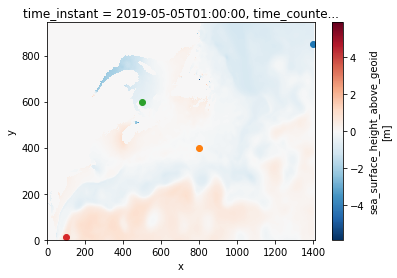

In [6]:
fig,ax=plt.subplots(1,1)
dt_2D.zos.isel(time_counter=0).plot(ax=ax)
coords= [(1400, 850), (800,400), (500,600), (100,10)]
for c in coords:
    print(c)
    ax.plot(c[0], c[1],'o')

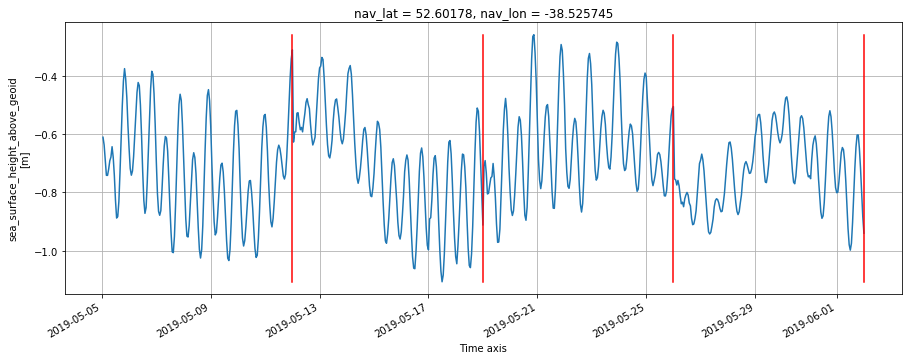

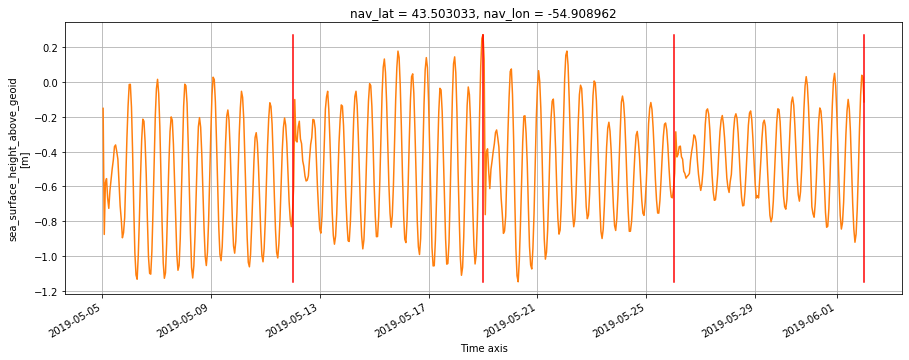

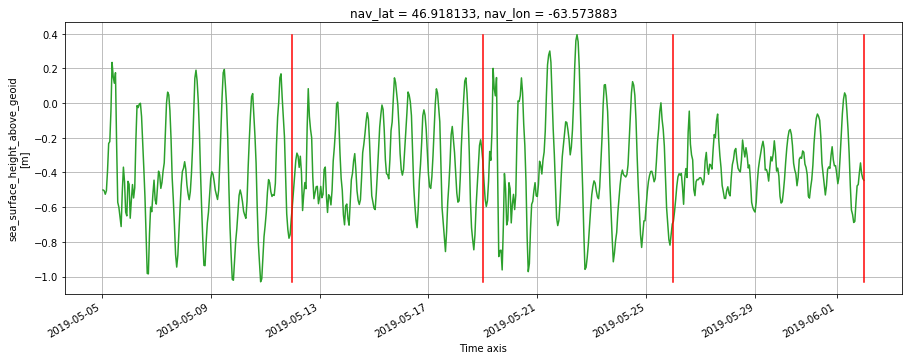

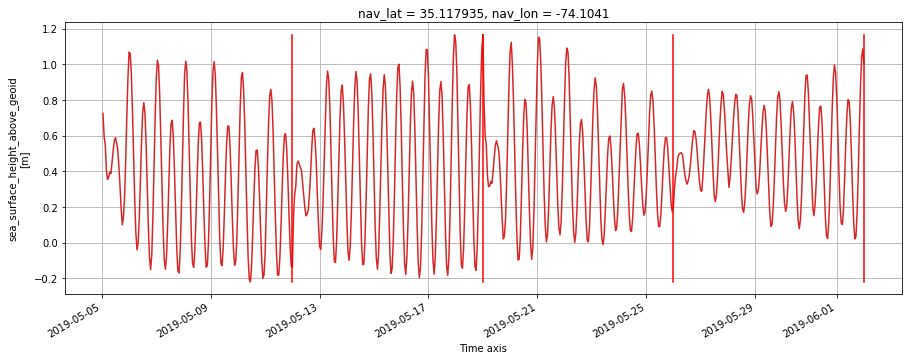

In [7]:
n=len(coords)
colors=['C{}'.format(l) for l in range(n)]
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    dt_2D.zos.isel(x=c[0],y=c[1]).plot(ax=ax,color=color)
    minvar=dt_2D.zos.isel(x=c[0],y=c[1]).min()
    maxvar=dt_2D.zos.isel(x=c[0],y=c[1]).max()
    for d in restart_days:
        ax.plot([d,d], [minvar, maxvar], 'r-')
    ax.grid()

In the ssh, there is a clear shock to the system after every restart. The shock introduces a wave that is most apparent away from the boundaries, particularly in the Gulf of St. Lawrence.

## surface currents (U)

In [8]:
files_U=glob.glob(os.path.join(data_dir, '*_000', '*grid_U*'))
files_U.sort()
du_2D = xr.open_mfdataset(files_U)

(1400, 850)
(800, 400)
(500, 600)
(100, 10)


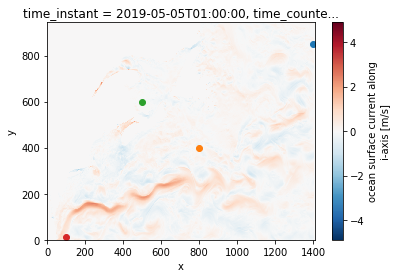

In [9]:
fig,ax=plt.subplots(1,1)
du_2D.uos.isel(time_counter=0).plot(ax=ax)
for c in coords:
    print(c)
    ax.plot(c[0], c[1],'o')

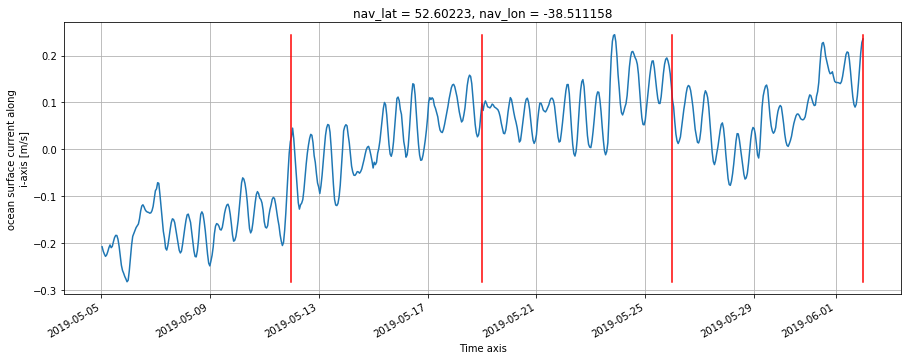

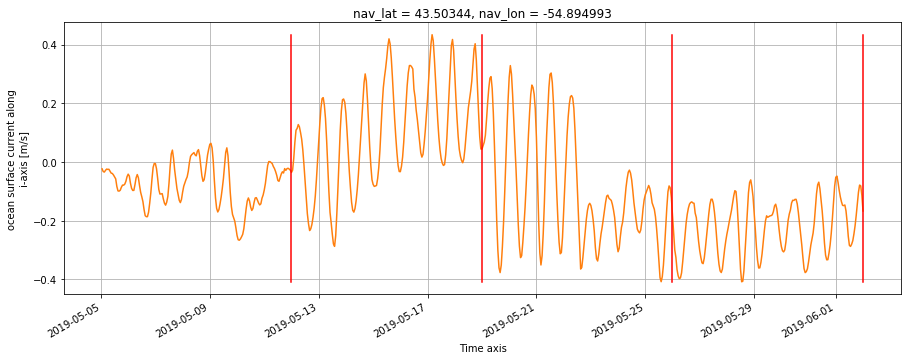

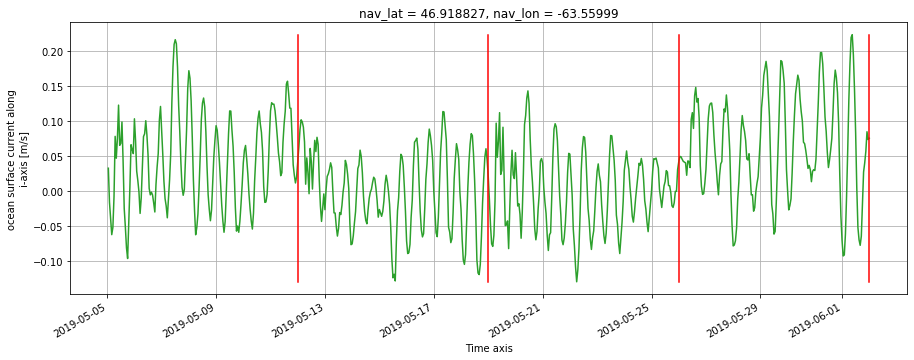

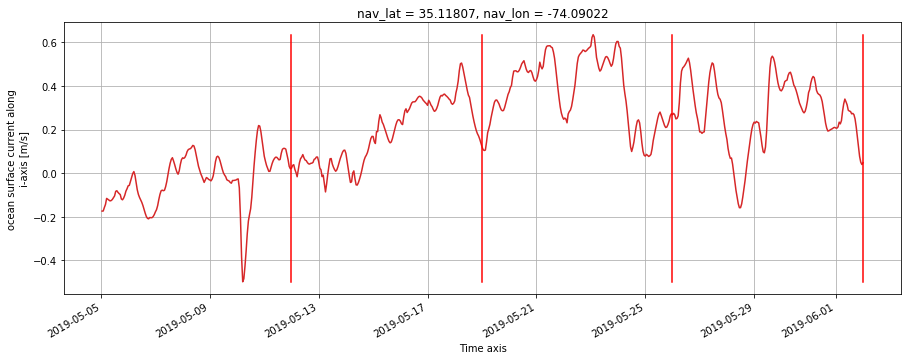

In [10]:
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    du_2D.uos.isel(x=c[0],y=c[1]).plot(ax=ax,color=color)
    minvar=du_2D.uos.isel(x=c[0],y=c[1]).min()
    maxvar=du_2D.uos.isel(x=c[0],y=c[1]).max()
    for d in restart_days:
        ax.plot([d,d], [minvar, maxvar], 'r-')
    ax.grid()

# 3D vs 2D velocities

How do the 3D velocities compare to the 2D?

In [11]:
files_U3D=glob.glob(os.path.join(data_dir, '*_000_3D', '*grid_U*'))
files_U3D.sort()
du_3D = xr.open_mfdataset(files_U3D)

In [12]:
print(du_3D)
print(du_3D.time_counter)

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, depthu: 75, time_counter: 28, x: 1410, y: 945)
Coordinates:
    nav_lat              (y, x) float32 34.87765 34.877888 ... 54.303127
    nav_lon              (y, x) float32 -76.86318 -76.83542 ... -38.40253
  * depthu               (depthu) float32 0.50753003 1.5575695 ... 5902.061
    time_instant         (time_counter) datetime64[ns] dask.array<shape=(28,), chunksize=(7,)>
  * time_counter         (time_counter) datetime64[ns] 2019-05-06 ... 2019-06-02
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds        (time_counter, depthu, axis_nbounds) float32 dask.array<shape=(28, 75, 2), chunksize=(7, 75, 2)>
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<shape=(28, 2), chunksize=(7, 2)>
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<shape=(28, 2), chunksize=(7, 2)>
    uo                   (time_counter, depthu, y, x) float32 dask

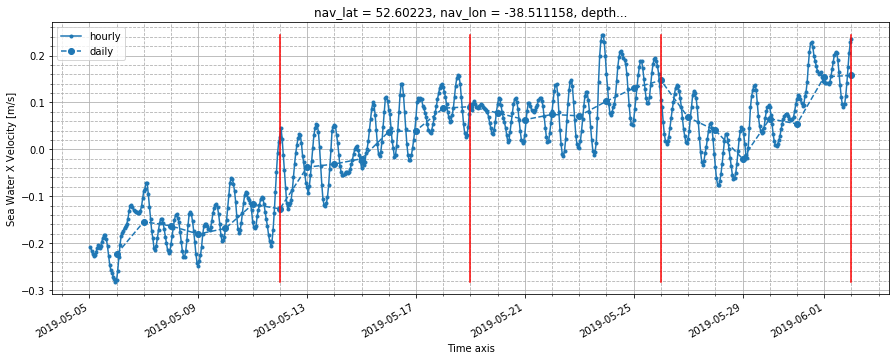

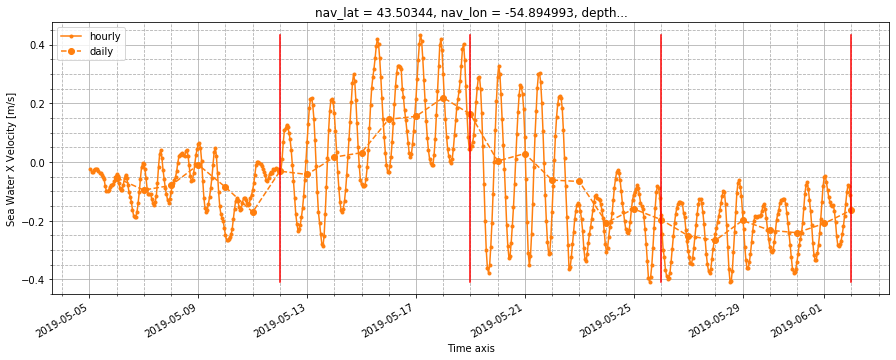

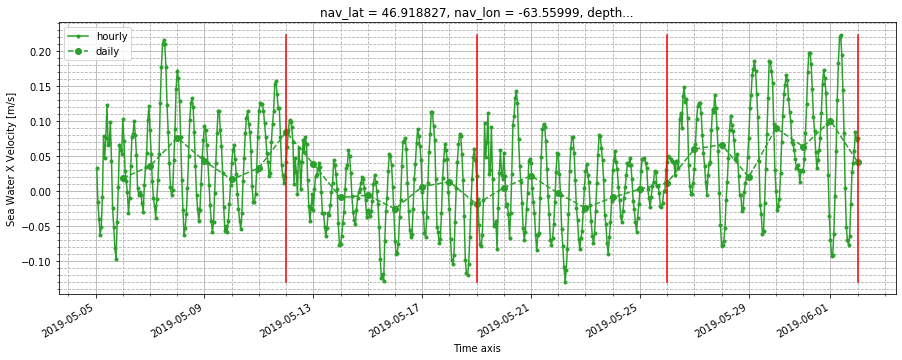

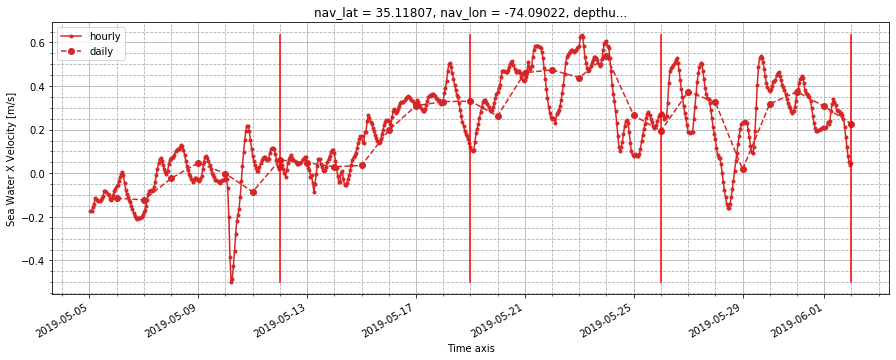

In [13]:
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    du_2D.uos.isel(x=c[0],y=c[1]).plot(ax=ax,color=color,label='hourly',marker='.')
    du_3D.uo.isel(depthu=0,x=c[0],y=c[1]).plot(ax=ax,color=color, linestyle='--',marker='o',label='daily')
    minvar=du_2D.uos.isel(x=c[0],y=c[1]).min()
    maxvar=du_2D.uos.isel(x=c[0],y=c[1]).max()
    for d in restart_days:
        ax.plot([d,d], [minvar, maxvar], 'r-',label=None)
    ax.legend()
    ax.minorticks_on()
    ax.grid()
    ax.grid(which='minor', ls='--')

In [14]:
du_2D.uos

<xarray.DataArray 'uos' (time_counter: 672, y: 945, x: 1410)>
dask.array<shape=(672, 945, 1410), dtype=float32, chunksize=(168, 945, 1410)>
Coordinates:
    nav_lat       (y, x) float32 34.87765 34.877888 ... 54.302116 54.303127
    nav_lon       (y, x) float32 -76.86318 -76.83542 ... -38.432068 -38.40253
    time_instant  (time_counter) datetime64[ns] dask.array<shape=(672,), chunksize=(168,)>
  * time_counter  (time_counter) datetime64[ns] 2019-05-05T01:00:00 ... 2019-06-02
Dimensions without coordinates: y, x
Attributes:
    long_name:           ocean surface current along i-axis
    units:               m/s
    online_operation:    instant
    interval_operation:  60 s
    interval_write:      1 h
    cell_methods:        time: point (interval: 60 s)

In [15]:
du_3D.uo

<xarray.DataArray 'uo' (time_counter: 28, depthu: 75, y: 945, x: 1410)>
dask.array<shape=(28, 75, 945, 1410), dtype=float32, chunksize=(7, 75, 945, 1410)>
Coordinates:
    nav_lat       (y, x) float32 34.87765 34.877888 ... 54.302116 54.303127
    nav_lon       (y, x) float32 -76.86318 -76.83542 ... -38.432068 -38.40253
  * depthu        (depthu) float32 0.50753003 1.5575695 ... 5698.064 5902.061
    time_instant  (time_counter) datetime64[ns] dask.array<shape=(28,), chunksize=(7,)>
  * time_counter  (time_counter) datetime64[ns] 2019-05-06 ... 2019-06-02
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           Sea Water X Velocity
    units:               m/s
    online_operation:    instant
    interval_operation:  1 d
    interval_write:      1 d
    cell_methods:        time: point

In [16]:
du_3D.time_counter_bounds.values

array([['2019-05-06T00:00:00.000000000', '2019-05-06T00:00:00.000000000'],
       ['2019-05-07T00:00:00.000000000', '2019-05-07T00:00:00.000000000'],
       ['2019-05-08T00:00:00.000000000', '2019-05-08T00:00:00.000000000'],
       ['2019-05-09T00:00:00.000000000', '2019-05-09T00:00:00.000000000'],
       ['2019-05-10T00:00:00.000000000', '2019-05-10T00:00:00.000000000'],
       ['2019-05-11T00:00:00.000000000', '2019-05-11T00:00:00.000000000'],
       ['2019-05-12T00:00:00.000000000', '2019-05-12T00:00:00.000000000'],
       ['2019-05-13T00:00:00.000000000', '2019-05-13T00:00:00.000000000'],
       ['2019-05-14T00:00:00.000000000', '2019-05-14T00:00:00.000000000'],
       ['2019-05-15T00:00:00.000000000', '2019-05-15T00:00:00.000000000'],
       ['2019-05-16T00:00:00.000000000', '2019-05-16T00:00:00.000000000'],
       ['2019-05-17T00:00:00.000000000', '2019-05-17T00:00:00.000000000'],
       ['2019-05-18T00:00:00.000000000', '2019-05-18T00:00:00.000000000'],
       ['2019-05-19T00:00

In [17]:
du_2D.time_counter_bounds.values

array([['2019-05-05T01:00:00.000000000', '2019-05-05T01:00:00.000000000'],
       ['2019-05-05T02:00:00.000000000', '2019-05-05T02:00:00.000000000'],
       ['2019-05-05T03:00:00.000000000', '2019-05-05T03:00:00.000000000'],
       ...,
       ['2019-06-01T22:00:00.000000000', '2019-06-01T22:00:00.000000000'],
       ['2019-06-01T23:00:00.000000000', '2019-06-01T23:00:00.000000000'],
       ['2019-06-02T00:00:00.000000000', '2019-06-02T00:00:00.000000000']],
      dtype='datetime64[ns]')

In [18]:
du_3D.depthu.isel(depthu=0).values

array(0.50753003, dtype=float32)

Now I'm confused about the metadata on the 3D files. It says that the values are instantaneous but why don't the houry and daily fields lineup? They look like daily averages. It should be fairly straitfoward to check...

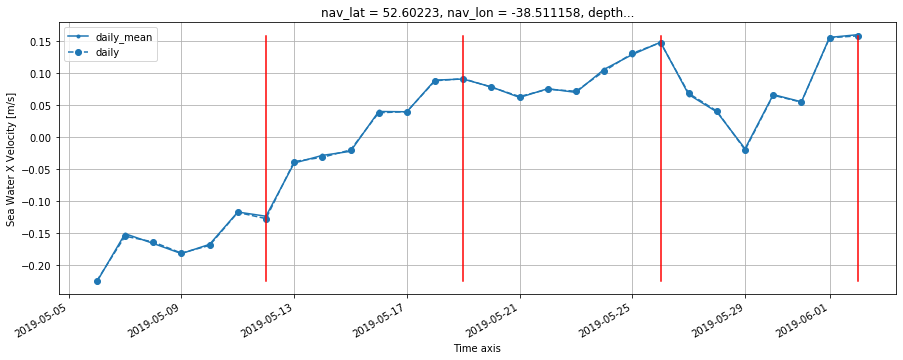

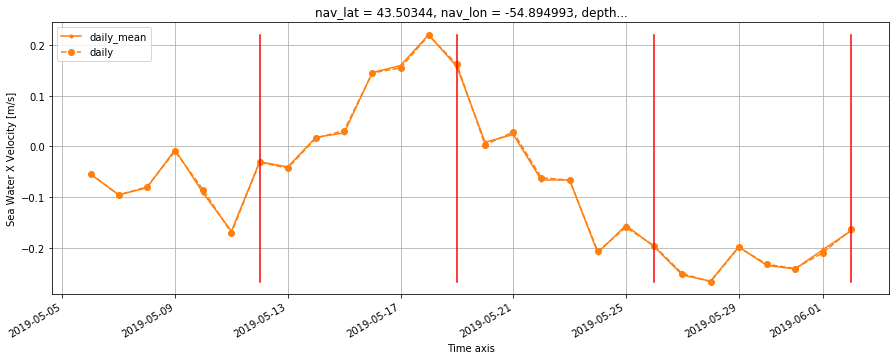

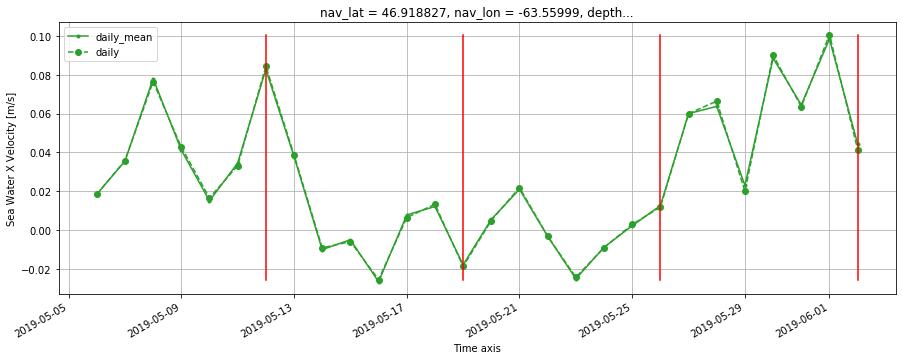

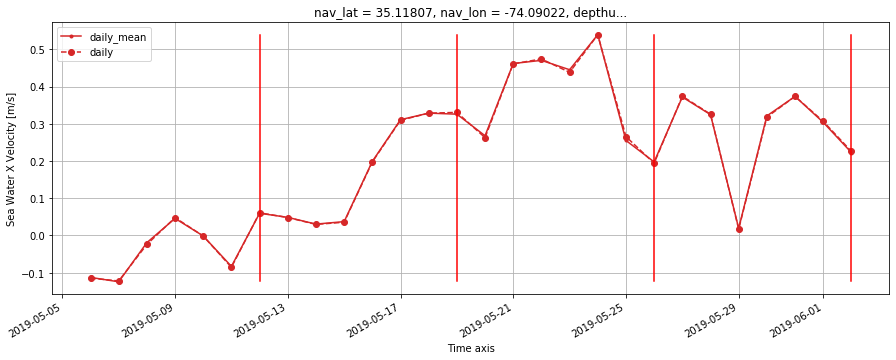

In [19]:
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    dres = du_2D.uos.isel(x=c[0],y=c[1]).resample({'time_counter':'1D'},label='right', closed='right').mean()
    dres.plot(ax=ax,color=color, linestyle='-',marker='.',label='daily_mean')
    du_3D.uo.isel(depthu=0,x=c[0],y=c[1]).plot(ax=ax,color=color, linestyle='--',marker='o',label='daily')
    minvar=du_3D.uo.isel(depthu=0,x=c[0],y=c[1]).min()
    maxvar=du_3D.uo.isel(depthu=0,x=c[0],y=c[1]).max()
    for d in restart_days:
        ax.plot([d,d], [minvar, maxvar], 'r-',label=None)
    ax.legend()
    ax.grid()

Yes, indeed the 3D fields are daily averages. Wow that metadata is confusing....

So, the spurious waves that are present after each seven day initialzation are averaged in the 3D files. 

Do the 2016-208 data also contain these shocks?

# 2016 to 2018

In [20]:
files_T=glob.glob(os.path.join('/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/netcdf_2D', '*grid_T*'))
files_T.sort()
dt_2D_2016 = xr.open_mfdataset(files_T)

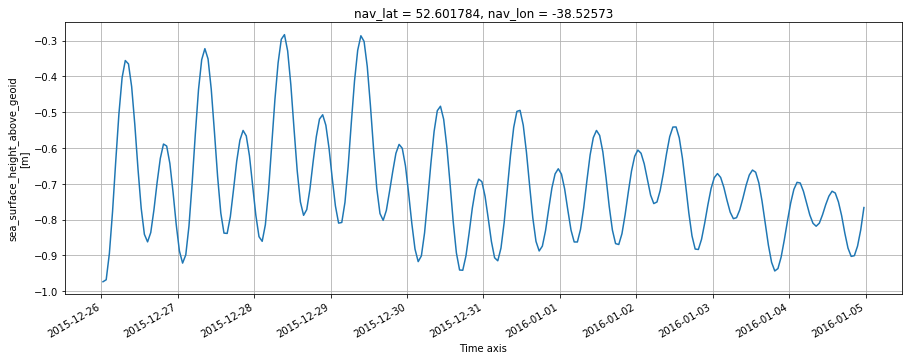

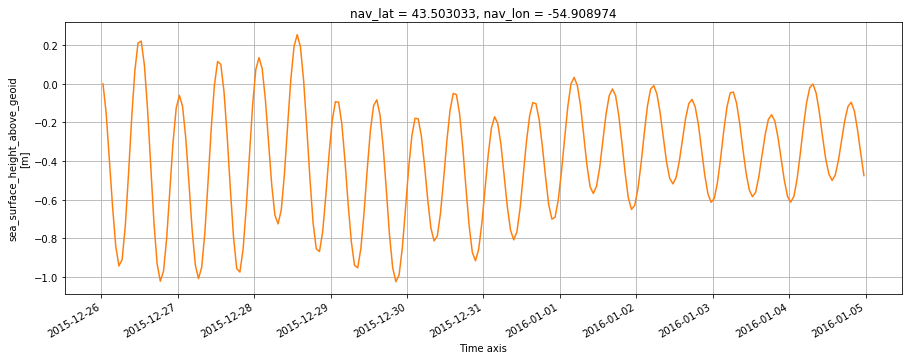

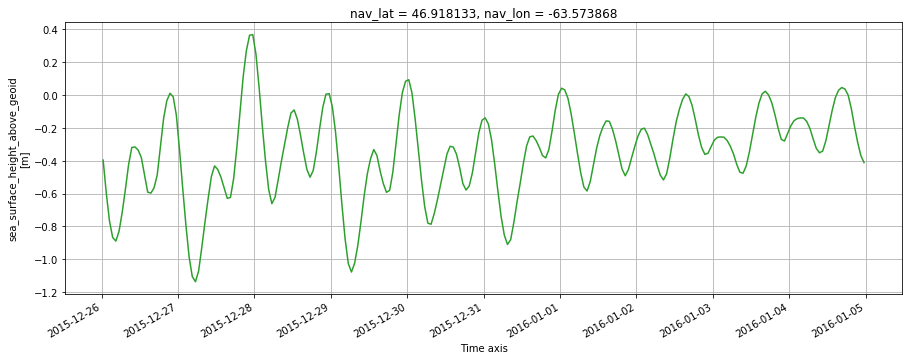

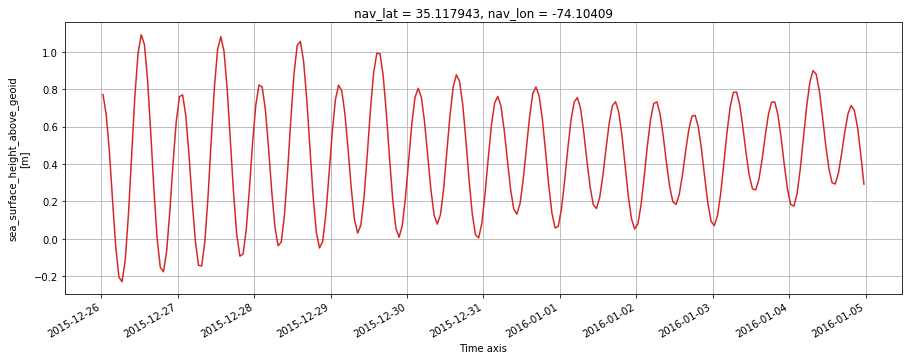

In [21]:
n=len(coords)
colors=['C{}'.format(l) for l in range(n)]
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    dt_2D_2016.zos.isel(x=c[0],y=c[1]).plot(ax=ax,color=color)
    minvar=dt_2D_2016.zos.isel(x=c[0],y=c[1]).min()
    maxvar=dt_2D_2016.zos.isel(x=c[0],y=c[1]).max()
    ax.grid()

Good, restarts look to be done correctly in the 2016-2018 runs.

# Summary

* The 2019 CIOPS-E catchup run did not configure the restarts correctly. As a results, each restart introduces a spurious wave into the system. This wave is (visibily) detectable in the sea surface height and currents. The impact seems to be greater in regions far away from the boundary which likely restores to forcing quicker.
* The impact these waves and "spin ups" on the daily average currents has not quantitatively assessed. 
* It is still unclear what is meant by "spin up". Were some of the fields initialized at zero? Or was there an error in how the tidal boundary forcing was applied?
* 